In [1]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

# Introduction


## Synthetic data in gCastle 

Synthetic data is often a natural choice for benchmarking causal discovery algorithms, as not many real-world causal datasets are publicly available. gCastle provides us with the datasets module, which allows us to generate synthetic data easily. 

### gCastle’s datasets module 

The two main objects in the module are DAG and IIDSimulation. The former allows us to generate graphs (structure) in the form of an adjacency matrix. The latter generates the actual data given an adjacency matrix and a set of parameters that define the properties of structural equations that determine the relationships between variables. 

The DAG object allows us to generate five different types of graphs: 

* Erdős–Rényi 
* Scale-free (Barabási–Albert) 
* Bipartite 
* Hierarchical 
* Low-rank 

#### Graph types, graph theory, and network science 

* The idea of distinguishing between different types of graphs comes from graph theory and was later extended by what we know today as network science. The latter started with the works of two Hungarian mathematicians, Paul Erdős and Alfréd Rényi, who studied so-called random graphs (Erdös and Rényi, 1959). More recently, network science regained popularity with the works of Albert-László Barabási and Réka Albert (for example, Barabási and Albert, 1999; Barabási, 2009). *

The **`IIDSimulation`** object allows us to choose between linear and non-linear assignments. Linear datasets can be binary (**logistic**) or continuous. Continuous datasets can be created using one of four different noise distributions: 

* Gaussian (gauss) 
* Exponential (exp) 
* Gumbel (gumbel) 
* Uniform (uniform) 

Non-linear datasets can be generated using the following: 

* **Multilayer perceptron (`mlp`)** 
* Two versions of **Gaussian processes** (**`gp`** and **`gp-add`**) 
* Quadratic function (**`quadratic`**) 
* Multiple index model (**`mim`**; Zheng et al., 2020) 

There’s also an additional simulator class called **`THPSimulation`**, which allows for simulating event sequences with **Topological Hawkes Processes (THP)**.

The discussion on THP is beyond the scope of this book. To learn more, check Cai et al. (2021). 

Let’s generate some data. On the way, we’ll also briefly discuss scale-free graphs and the main parameters of the IIDSimulation object. 

### Generating the data with gCastle 

Let’s start with the imports. The code for this chapter can be found in the notebook at [https://bit.ly/causal-ntbk-13](https://bit.ly/causal-ntbk-13). We import the `DAG` and `IIDSimulation` objects from gCastle. Additionally, we import NetworkX and Matplotlib for visualizations: 

In [2]:
from castle.datasets import DAG, IIDSimulation
import networkx as nx
import matplotlib.pyplot as plt 

import numpy as np

We set the seed to keep the code reproducible: 

In [3]:
SEED = 18
np.random.seed(SEED) 

Now, we’re ready to generate our first adjacency matrix:

In [4]:
adj_matrix = DAG.scale_free(
    n_nodes=10,
    n_edges=17,
    seed=SEED
) 


We use the `.scale_free()` method of the `DAG` object. We specify the number of nodes to be 10 and the number of edges to be 17. We fix the random seed to the predefined value. 

Scale-free networks have a number of interesting properties. They are created using a probabilistic **preferential attachment** mechanism. A node with a large number of connections is more likely to gain new connections than a node with a smaller number of connections. 

This is sometimes metaphorically described as *the rich get richer*. The distribution of node degrees (number of edges per node) in scale-free networks is fat-tailed. This is because scale-free networks tend to have a few strongly connected hubs and a majority of nodes have a significantly smaller number of connections. 

Although scale-free networks were known at least from the 1960s (although not necessarily under their current name), they significantly gained popularity in the late 1990s and early 2000s with the works of Albert-László Barabási and Réka Albert, who proposed that scale-free networks can be used to model the internet interlink structure and other real-world systems (Barabási and Albert, 1999; Barabási, 2009). 

#### Graphs, networks, and adjacency matrices 

*In network science terms, graph and network are used interchangeably. As we discussed in Chapter 4, graphs can be represented as adjacency matrices, and matrices can be visualized as graphs. We extensively use this correspondence in the current chapter.*

 Let’s plot the graph representing our adjacency matrix and see whether we can recognize the preferential attachment scheme in the plot. We’ll use NetworkX for this purpose. 
 
First, let’s transform the adjacency matrix into the NetworkX directed graph object: 

In [5]:
g = nx.DiGraph(adj_matrix) 

Next, let’s plot the graph g: 

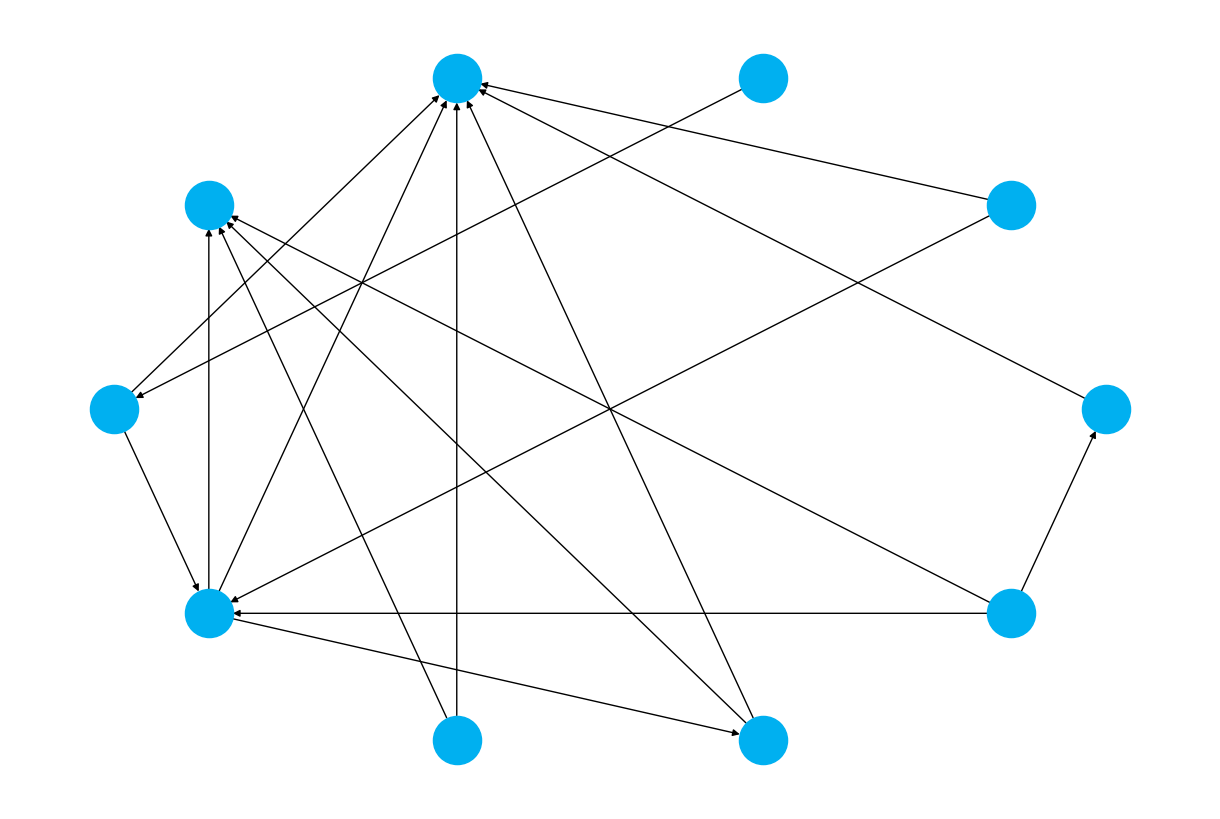

In [6]:
plt.figure(figsize=(12, 8))
nx.draw(G=g,
    node_color=COLORS[0],
    node_size=1200,
    pos=nx.circular_layout(g)
) 

We set the figure size using Matplotlib and pass a number of parameters to NetworkX’s nx.draw() method. We pass g as a graph, set the node color and size, and define the network layout to increase readability. The circular layout should provide good visual clarity for our relatively small graph. To learn about other layout options in NetworkX, check https://bit.ly/NetworkXLayouts or the NetworkX documentation (https://bit.ly/NetworkXDrawingDocs).



At the top, we see a highly connected node with six incoming edges. This is the effect of the preferential attachment mechanism. If we grew our graph further, the differences between highly connected nodes and less connected nodes would become even more visible. Looking at the graph in Figure 13.1, you can imagine how the preferential attachment mechanism would add more edges to the more connected nodes and fewer edges to the less connected ones. 

We are now ready to generate some data. We’ll use our adjacency matrix, `adj_matrix`, and generate 10,000 observations with linear structural assignments and Gaussian noise: 

In [7]:
dataset = IIDSimulation(
    W=adj_matrix,
    n=10000,
    method='linear',
    sem_type='gauss'
) 

2024-03-04 20:43:10,797 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


The parameter `W` accepts adjacency matrices as NumPy arrays. Matrices can be (but do not have to be) weighted, `n` determines the number of samples returned, and we can choose between linear and non-linear datasets via the `method` parameter (available options are **linear** and **nonlinear**). Finally, `sem_type` determines the key characteristics of the structural assignments (gauss, exp, mlp, etc.). 

The `dataset` object produced by `IIDSimulation` has two attributes: `X` and `B`. The former contains the actual data, and the latter contains the adjacency matrix. 

We can access the generated data as follows: 

In [8]:
dataset.X 

array([[ 0.20316071,  0.46957875, -0.5451643 , ...,  0.43655576,
        -3.9526261 , -0.58334128],
       [ 0.95028014,  0.69055054,  0.25689778, ...,  1.33061022,
         3.60491164,  0.53405008],
       [-0.8786259 ,  1.0482187 ,  0.63440113, ..., -0.39639459,
         0.32608207, -1.0564536 ],
       ...,
       [-0.91570809, -0.0239333 , -0.2915973 , ...,  1.2503226 ,
        -3.98304516, -1.29869284],
       [-0.15152213, -0.35457535, -0.59788574, ...,  0.18337993,
        -2.57206537, -1.28173348],
       [-2.53845353,  0.83873167, -0.46620237, ...,  0.72125983,
        -0.51524042, -2.73397931]])

With our dataset generated, let’s learn how to fit a gCastle causal discovery model.

## Fitting your first causal discovery model 

gCastle offers a broad variety of causal discovery models, from classics such as PC and GES models up to recent gradient-based methods such as GOLEM. 

For the sake of this demonstration, we will use the PC algorithm. 

Let’s start with the imports: 

In [9]:
from castle.algorithms import PC 

2024-03-04 20:43:18,853 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-03-04 20:43:22,656 - c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


After importing the model class, we need to instantiate it. 

In [10]:
pc = PC() 

Training the model is extremely simple: 

In [11]:
pc.learn(dataset.X) 

The output of a causal discovery algorithm is a learned adjacency matrix. Depending on the method you use, this matrix can be either weighted or unweighted. In our case, we learned an unweighted adjacency matrix. Let’s access it: 

In [12]:
pred_dag  = pc.causal_matrix 
pred_dag 

Tensor([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0]])


This will print out the learned causal matrix. 

Now that we have learned the adjacency matrix, we are ready to compare it with the ground truth. First, we’ll do it visually. 

## Visualizing the model 

In the previous subsection, we visualized the adjacency matrix as a graph. Let’s do the same for the true DAG and the learned DAG to compare them. 

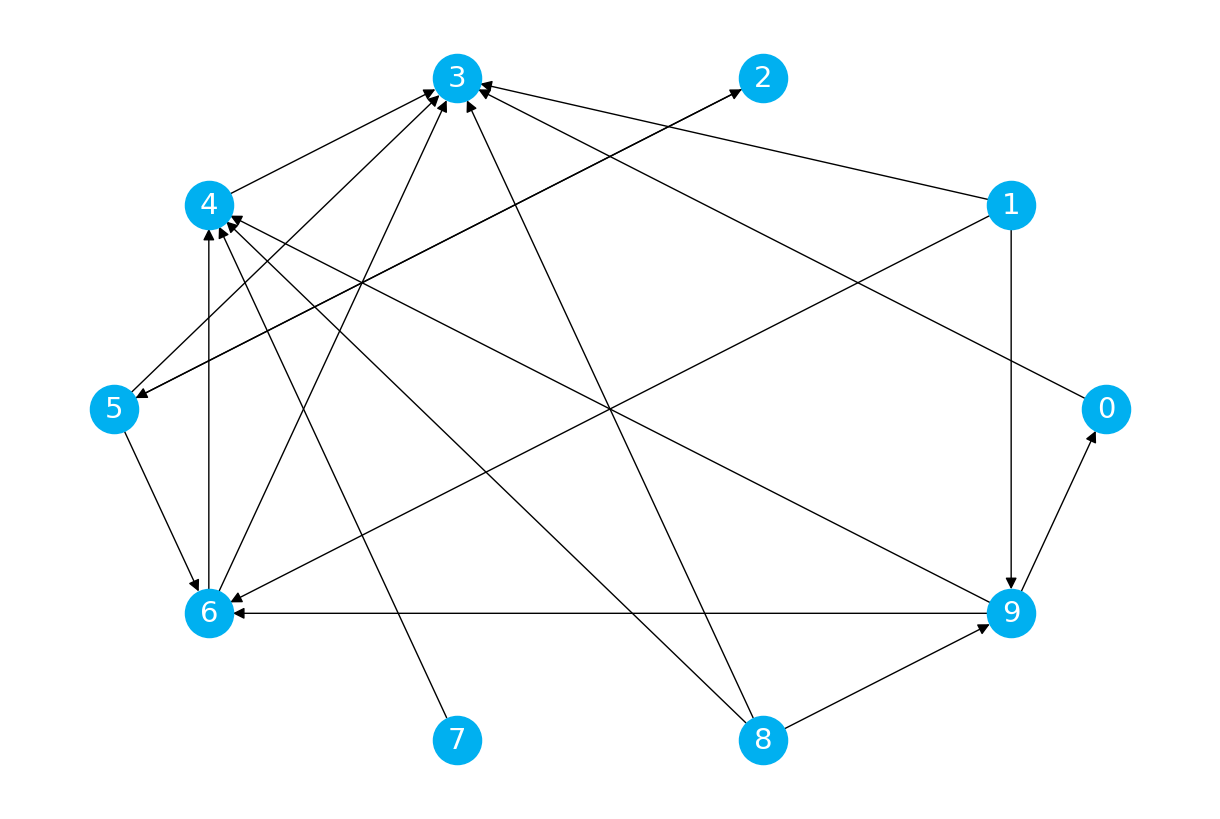

In [13]:
g_pred = nx.DiGraph(pred_dag)

plt.figure(figsize=(12, 8))
nx.draw(
    G=g_pred,
    node_color=COLORS[0],
    node_size=1200,
    arrowsize=17,
    with_labels=True,
    font_color='white',
    font_size=21,
    pos=nx.circular_layout(g)
)


We added yellow arrows in Figure 13.2 to denote incorrectly identified edges. Note that the edge between nodes 2 and 5 exists in both the true and the learned DAGs, but in the learned DAG, this edge is *bidirectional*. This is a practical example of a situation where a causal discovery model returns a **complete partially directed acyclic graph** (**CPDAG**; recall our discussion on **Markov equivalence classes** in Chapter 5). 

Comparing two graphs visually is only useful for smaller graphs. Although our graph has only 10 nodes and 17 edges, the comparison might be already challenging for some of us. Another way to visualize adjacency matrices is to use heatmaps. Because our adjacency matrix is unweighted, a respective heatmap will be binary. In a binary heatmap, each cell can only have one of two values (0 or 1).

gCastle comes with a convenience object called `GraphDAG` that plots comparison heatmaps for us. Let’s import `GraphDAG` and see it in action: 

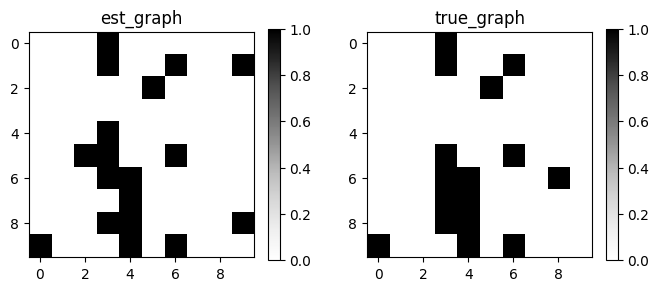

In [14]:
from castle.common import GraphDAG
GraphDAG(
    est_dag=pred_dag,
    true_dag=adj_matrix)

After a short inspection, you should be able to spot four differences between the two matrices in Figure 13.3. That’s congruent with our observation from Figure 13.2. 

Although heatmaps might make it easier for us to make visual comparisons between slightly bigger graphs, they only work to a point. 

Visual comparisons might be useful and even very helpful in certain cases, yet their usefulness is limited due to the limitations of our human attention, which can only track between three and seven elements at a time. That’s when numerical evaluation metrics become useful.

## Model evaluation metrics 

gCastle comes with a dedicated object for model evaluation called `MetricsDAG`. 

Let’s import the object and instantiate it: 

In [15]:
from castle.metrics import MetricsDAG

metrics = MetricsDAG(
    B_est=pred_dag,
    B_true=adj_matrix
) 

c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_tp =  (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_fn_r = (W_p - W_true).applymap(lambda elem:1 if elem==1 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:221: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TP = (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()



The newly created `metrics` object computes a number of useful metrics for us internally. We can access them through a dictionary internally stored as an attribute called `metrics`. The values for all available metrics can be easily accessed via respective dictionary keys. For example, to access the F1 score, we do it in the following way: 

In [16]:
metrics.metrics['F1'] 

0.8235


The F1 score for the PC algorithm on our graph is as follows: 0.8824 

As of the time of writing (gCastle, version 1.0.3), there are nine available metrics in MetricsDAG. We can access the complete metrics dictionary as follows:

In [17]:
metrics.metrics 

{'fdr': 0.1765,
 'tpr': 0.875,
 'fpr': 0.1034,
 'shd': 5,
 'nnz': 17,
 'precision': 0.7778,
 'recall': 0.875,
 'F1': 0.8235,
 'gscore': 0.625}


This will give us the following: {'fdr': 0.1176,
 'tpr': 0.9375,
 'fpr': 0.069,
 'shd': 3,
 'nnz': 17,
 'precision': 0.8333,
 'recall': 0.9375,
 'F1': 0.8824,
 'gscore': 0.75}

| Name                                       | Acronym | Definition                                                                 |
|--------------------------------------------|---------|----------------------------------------------------------------------------|
| False Discovery Rate                       | FDR     | $\frac{rev + FP}{TP+FP}$          |
| True Positive Rate                         | TPR     | $\frac{TP}{TP+FN}      |
| False Positive Rate                        | FPR     | $\frac{rev + FP}{TN+FP}$    |
| Structural Hamming Distance                | SHD     | No. of edge additions, flips, or deletions to get from the predicted graph to the true one. |
| No. of Non-Negative Entries                | NNZ     | $TP+FP$                 |
| Precision                                  | Precision | $\frac{TP}{TP+FP}$       |
| Recall                                     | Recall  | $\frac{TP}{TP+FN}$           |
| F1 Score                                   | F1      | $2\frac{recall \times precision}{recall + precision}$                                |
| G-Score                                    | GScore  | $max(0, \frac{TP-FP}{TP+FN})$    |


* TP stands for the number of true positives
* FP stands for the number of false positives
* TN stands for the number of true negatives
* FN stands for the number of false negatives
* *rev* represents the number of reversed edges

We would count an entry in the adjacency matrix as a true positive if we predicted that this entry should be 1 and it is also 1 in the true graph. 

On the other hand, we say that an entry is a true negative when we predicted it to be 0 and it’s also 0 in the true graph.

If we predicted an entry as 1 but in fact, it’s 0, we count it as a false positive. 

If we predicted an entry as 0 but in fact, it’s 1, we count it as a false negative. 

Reversed edges are the ones that exist in the predicted and the true graph, but we mispredicted their orientation (direction). 

We’ll discuss how to understand some of the metrics in the subsequent sections. 

There are two other useful quantities that you might want to compute when benchmarking causal discovery methods: the number of undirected edges and the **structural intervention distance** (**SID**) (Peters and Bühlmann, 2015). 

We can implement the former, for instance, this way:

In [18]:
def get_n_undirected(g):
    total = 0
    for i in range(g.shape[0]):
        for j in range(g.shape[0]):
            if (g[i, j] == 1) and (g[i, j] == g[j, i]):
                total += .5
    return total

The latter is available in the CDT Python package (https://bit.ly/CDTMetricsDocs) as a wrapper for an R implementation. 

Now, let’s summarize what we’ve learned in this section. 

* In this section, we introduced gCastle, a causal discovery library that we will use throughout this chapter. 
* We’ve discussed the four main modules of the package: the **synthetic data generation** module, **models** module, **data visualization** module, and **model evaluation** module. 
* We introduced data simulation and model fitting APIs, and demonstrated how to use the `GraphDAG` class for visualizations and the `MetricsDAG` class for calculating relevant metrics. 
* We defined the metrics available in gCastle and introduced two additional quantities that can help us assess our model’s quality: the number of undirected edges and SID. 

We’ll learn more about gCastle’s modules in the next sections while working with specific algorithms. Ready? Let’s start! 

# Constraint-based causal discovery 

In this section, we’ll introduce the first of the four families of causal discovery methods – constraint-based methods. We will learn the core principles behind constraint-based causal discovery and implement the **PC algorithm** (Sprites et al., 2000). By the end of this chapter, you will have a solid understanding of how constraint-based methods work and you’ll know how to implement the PC algorithm in practice using gCastle. 

## Constraints and independence 

**Constraint-based methods** (also known as **independence-based methods**) aim at decoding causal structure from the data by leveraging the independence structure between three basic graphical structures: **chains**, **forks**, and **colliders**. 

We’ll start by generating 1,000 observations and store them in a NumPy matrix:

In [19]:
# Build a DAG adj matrix
pc_dag = np.array([
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

N = 1000
p = np.random.randn(N)
q = np.random.randn(N)
r = p + q + .1 * np.random.randn(N)
s = .7 * r + .1 * np.random.randn(N)

# Store the data as a matrix
pc_dataset = np.vstack([p, q, r, s]).T 

Now, let’s instantiate and fit the algorithm: 

In [20]:
pc = PC()
pc.learn(pc_dataset) 

Let’s display the predicted causal matrix alongside the true DAG: 

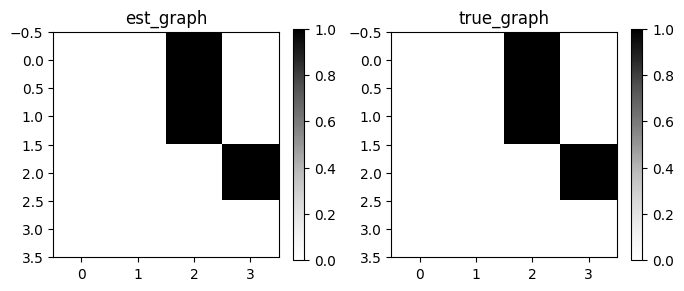

In [21]:
GraphDAG(
    est_dag=pc.causal_matrix,
    true_dag=pc_dag)
plt.show()

In [22]:
MetricsDAG(
    B_est=pc.causal_matrix,
    B_true=pc_dag
).metrics

c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_tp =  (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_fn_r = (W_p - W_true).applymap(lambda elem:1 if elem==1 else 0).sum(axis=1).sum()
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\causal_discovery\.venv\lib\site-packages\castle\metrics\evaluation.py:221: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TP = (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()


{'fdr': 0.0,
 'tpr': 1.0,
 'fpr': 0.0,
 'shd': 0,
 'nnz': 3,
 'precision': 1.0,
 'recall': 1.0,
 'F1': 1.0,
 'gscore': 1.0}

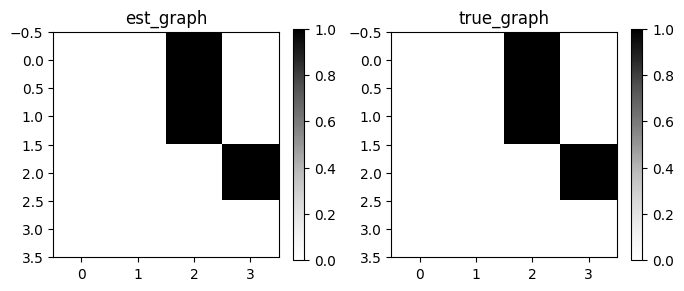

In [23]:
pc_stable = PC(variant='stable')
pc_stable.learn(pc_dataset) 

GraphDAG(
    est_dag=pc_stable.causal_matrix,
    true_dag=pc_dag)
plt.show()

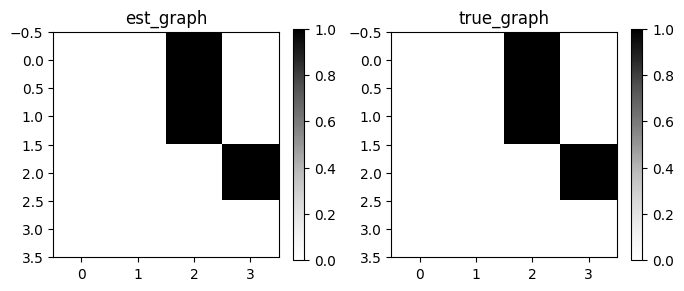

In [24]:
pc_parallel = PC(variant='parallel')
pc_parallel.learn(pc_dataset) 

GraphDAG(
    est_dag=pc_parallel.causal_matrix,
    true_dag=pc_dag)
plt.show()

# Score-based causal discovery

## GES in gCastle


In [25]:
from castle.algorithms import GES

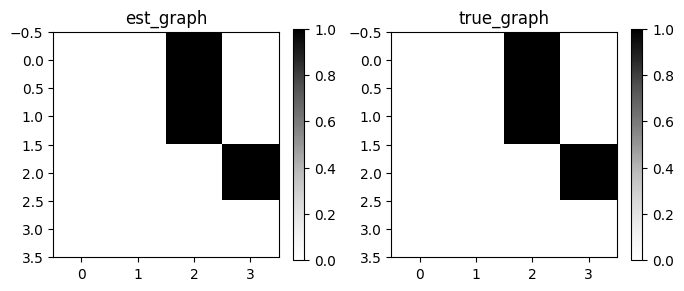

In [26]:
ges = GES(criterion='bic')

ges.learn(pc_dataset)

GraphDAG(
    est_dag=ges.causal_matrix,
    true_dag=pc_dag)
plt.show()

# Functional causal discovery

## ANM Model